# IMPORTING REQUIRED LIBRARIES

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# SUPPRESSING WARNINGS

In [62]:
def warn(*args, **kargs):
    pass
import warnings
warnings.warn = warn

# IMPORTING DATASET

In [63]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### displaying datatypes

In [64]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### displaying the statistical summary

In [65]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA WRANGLING

### dropping column " id " and unnamed

In [66]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### checking missing values 

In [67]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### replacing missing values

In [68]:
mean_bed = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bed, inplace=True)

In [69]:
mean_bath = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bath, inplace=True)

In [70]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

### counting the number of houses with unique floor values

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [72]:
unique_floors = df['floors'].value_counts().to_frame()
unique_floors

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### using boxplot to determine the outlier in waterfront column

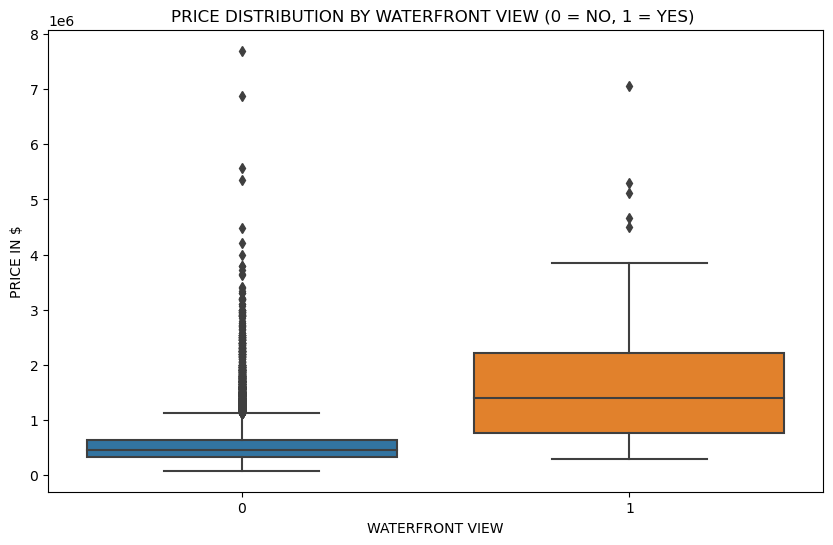

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront', y='price', data=df)

plt.xlabel('WATERFRONT VIEW')
plt.ylabel('PRICE IN $')
plt.title('PRICE DISTRIBUTION BY WATERFRONT VIEW (0 = NO, 1 = YES) ')
plt.show()

### using regplot to determine correlation of column 'sqft_above' with 'price'

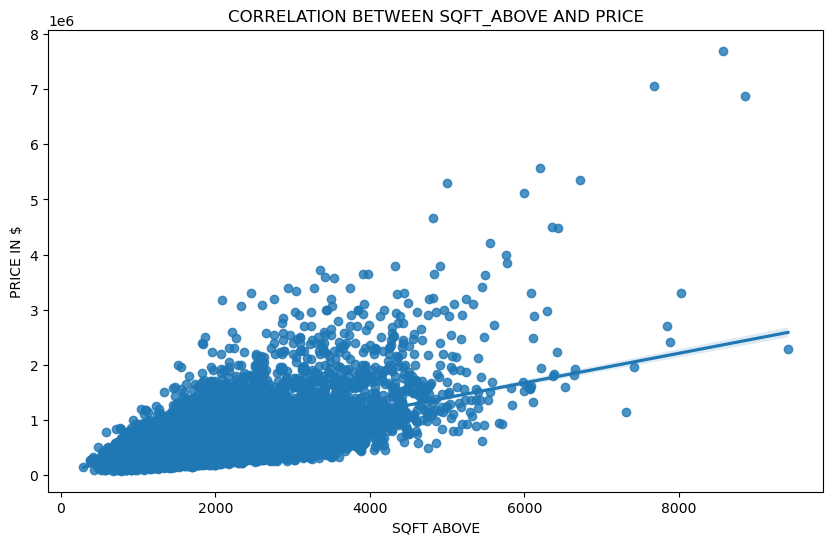

In [74]:
plt.figure(figsize=(10,6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('SQFT ABOVE')
plt.ylabel('PRICE IN $')
plt.title('CORRELATION BETWEEN SQFT_ABOVE AND PRICE')
plt.show()

In [75]:
df['sqft_above'].corr(df['price'])

0.6055672983560781

# MODEL DEVELOPMENT

### fitting linear regression model using feature 'long' and calculating r^2 

In [76]:
x1 = df[['long']]
y = df['price']

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(x1, y)

LinearRegression()

In [79]:
lm.score(x1, y)

0.00046769430149007363

### fitting linear regression model to predict price using feature 'sqft_living'

In [80]:
x2 = df[['sqft_living']]

In [81]:
lm.fit(x2, y)

LinearRegression()

In [82]:
lm.score(x2, y)

0.4928532179037931

### fitting linear regression model to predict price using different features

In [83]:
x3 = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]


In [84]:
lm.fit(x3, y)

LinearRegression()

In [85]:
lm.score(x3, y)

0.6576885711683069

### creating a pipeline to predict the price and fitting the object using the features in the list x3

In [86]:
Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=True)),
        ('model', LinearRegression())]

In [87]:
pipe = Pipeline(Input)
x3 = x3.astype(float)
pipe.fit(x3, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [88]:
y_pipe=pipe.predict(x3)
y_pipe

array([350038., 558842., 449822., ..., 417266., 459547., 417216.])

In [89]:
r2_score(y, y_pipe)

0.7513406444261047

# MODEL EVALUATION AND REFINEMENT

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

### splitting the data into training and testing sets

In [91]:
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [92]:
x = df[features]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [94]:
x_test.shape

(3242, 11)

In [95]:
x_train.shape

(18371, 11)

### fitting the ridge regression object using training data and setting the parameter to 0.1 and calculating r^2 using testing data

In [96]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [97]:
ypred = ridge_model.predict(x_test)
ypred

array([651781.17964158, 514958.12791319, 794388.65874944, ...,
       699470.4139    , 621518.44005307, 376624.68877618])

In [98]:
r2_score(y_test, ypred)

0.6478759163939118

### performing second order polynomial transformation on both training and testing data

In [99]:
pr = PolynomialFeatures (degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [100]:
ridge_model.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [101]:
y_hat = ridge_model.predict(x_test_pr)
y_hat

array([569564.08141743, 487971.29946974, 676763.60105742, ...,
       673971.98097743, 581200.71285513, 354174.69360373])

In [102]:
r2_score(y_test, y_hat)

0.7002744279539594